### Introdução

1. Esse script se refere à breve análise exploratória acerca dos dados trabalhados

### Bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sn
import os
import missingno as msno
%matplotlib inline
import plotly.express as px
import statsmodels.api as sm

### 0. Importação dos dados

In [ ]:
# Importe a base de dados já tratada
df_filmes_tratada = pd.read_excel('df_filmes_tratada.xlsx')

# Faça uma cópia para, qualquer coisa, não precisar importar de novo. Isso é muito bom quando estamos trabalhando com datasets muito grandes (não é o caso, mas fica a dica)
df = df_filmes_tratada.copy()

# Visualize os dados
df.head(3)

,Film,Rotten Tomatoes % critics,Metacritic % critics,Average critics %,Rotten Tomatoes Audience %,Metacritic Audience %,Rotten Tomatoes vs Metacritic % deviance,Average audience %,Audience vs Critics deviance %,Primary Genre,...,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western,Success,sucesso_recalculado
0,Lion,87,68,77.5,92,72.0,20,82,-4.5,drama,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,No Escape,46,38,42.0,67,65.0,2,66,-24,action,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
2,Insidious,67,52,59.5,65,70.0,-5,67.5,-8,horror,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0


In [ ]:
df2 = df.copy()

### 1. Refinamento dos dados

1. Veja se o tipo de cada variável está correto (use df2.dtypes) e ajuste (se necessário, abra o text editor para visualizar todas).

In [ ]:
df2 = df.copy()

In [ ]:
# Vamos alterar algumas colunas para o tipo string pois isso facilitará na visualização desses dados
list_var = []
def convert_dtype_category(base: pd.DataFrame, list_var: list) -> pd.DataFrame:
    """
    Converte o tipo de dados de uma ou mais variáveis de uma base de dados para categórico.

    Parâmetros:
    - base: pandas DataFrame contendo a base de dados que será modificada.
    - list_var: lista contendo os nomes das variáveis que terão seu tipo de dados convertido.

    Retorno:
    - pandas DataFrame contendo a base de dados com as variáveis especificadas convertidas para o tipo de dados categórico.
    """

    for var in list_var:
        base[var] = base[var].astype(str)

    return base

df2 = convert_dtype_category(df2, ['Oscar Winners', 'Action', 'Adventure', 'Animation',
       'Biography', 'Comedy', 'Crime', 'Drama', 'Family', 'Fantasy', 'History',
       'Horror', 'Music', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport',
       'Thriller', 'War', 'Western', 'Success', 'sucesso_recalculado'])

2. Faça uma lista das variáveis quantitativas e qualitativas. Isso vai ajudar na hora de plotar os gráficos.

In [ ]:
var_quant = df2._get_numeric_data().columns

var_quali = df2.select_dtypes("object_").columns

3. Para visualizar a distribuição dos dados, utilize o comando abaixo.

In [ ]:
pd.set_option('display.max_columns', 150)
df2[var_quant].describe(percentiles=[.01,.25,.5,.75,.99]).round(2)

,Rotten Tomatoes % critics,Metacritic % critics,Average critics %,Rotten Tomatoes Audience %,Opening weekend ($million),Opening Weekend,Domestic gross ($million),Domestic Gross,Foreign Gross ($million),Foreign Gross,Worldwide Gross,Worldwide Gross ($million),% of Gross earned abroad,% Budget recovered,Year_x,Rank,Year_y,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,506.00,506.00,506.00,506.00,506.00,5.060000e+02,506.00,5.060000e+02,506.00,5.060000e+02,5.060000e+02,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,60.82,58.50,59.66,67.63,29.13,2.913114e+07,94.96,9.496122e+07,144.38,1.444436e+08,2.320072e+08,233.32,0.57,4.39,2013.00,447.60,2012.92,114.88,6.79,214601.19,97.75,58.79
std,26.33,17.14,21.45,16.62,32.30,3.229584e+07,97.18,9.718048e+07,176.75,1.767031e+08,2.616964e+08,262.56,0.38,7.14,2.85,285.42,2.81,17.81,0.85,198227.36,98.41,17.00
min,2.00,11.00,8.50,20.00,0.03,2.838700e+04,0.36,3.550700e+05,0.00,0.000000e+00,3.954120e+05,0.40,0.00,0.00,2007.00,1.00,2006.00,81.00,1.90,279.00,0.25,11.00
1%,8.05,23.05,18.00,29.05,0.08,7.906065e+04,1.89,1.886834e+06,0.00,0.000000e+00,3.505749e+06,3.51,0.00,0.16,2007.00,6.05,2007.00,86.00,4.31,3713.35,2.30,23.00
25%,38.00,46.00,42.50,55.00,9.34,9.342718e+06,31.43,3.143300e+07,25.74,2.619755e+07,5.783263e+07,57.83,0.40,1.74,2011.00,200.25,2011.00,102.00,6.22,81527.50,32.30,47.00
50%,65.00,58.00,61.25,69.00,18.69,1.868757e+07,60.49,6.048962e+07,74.00,7.399500e+07,1.286350e+08,129.82,0.56,2.89,2014.00,414.00,2014.00,113.00,6.80,158418.00,62.48,58.00
75%,85.00,72.00,77.88,82.00,37.25,3.724756e+07,128.01,1.280081e+08,205.40,2.054043e+08,3.021137e+08,304.71,0.68,4.55,2016.00,684.75,2015.00,124.00,7.40,294850.75,130.10,72.00
99%,98.00,95.95,96.48,94.95,157.92,1.579247e+08,446.97,4.469655e+08,802.56,8.025607e+08,1.107703e+09,1107.70,1.91,30.33,2017.00,984.95,2016.00,165.95,8.40,864657.50,446.96,95.95
max,99.00,100.00,99.00,98.00,208.81,2.088063e+08,652.05,6.520506e+08,1014.00,1.014000e+09,1.666051e+09,1666.05,4.02,120.74,2018.00,1000.00,2016.00,180.00,9.00,1791916.00,652.18,100.00


In [ ]:
# Faça uma cópia dos dados
df3 = df2.copy()

### 2. EDA Univariada

In [ ]:
# faça uma cópia dos dados
df4 = df3.copy()

#### 0. Matriz de correlação

In [ ]:
# Calcular a matriz de correlações para as colunas numéricas
correlation_matrix = df4[var_quant].corr()

# Plotar o mapa de calor (heatmap) das correlações
fig_heatmap = px.imshow(correlation_matrix, color_continuous_scale='RdBu', title="Mapa de Calor - Correlações")
fig_heatmap.show()

#### Algumas conclusões da matriz de correlação:
1. A correlação entre Budget do filme e a média das notas do Review é baixa (-0.014). Influência quase nula.
2. A correlação entre Budget do Filme e Budget Recovered é negativa (-0.17). Esperava-se que quanto maior o Budget, melhor seria o ROI.

#### 1. Plote um histograma e um boxplot sobrepostos para cada variável quantitativa na lista de variáveis quantitativas.

In [ ]:
import plotly.express as px

def hist_box_plots(var_quant, df):
    """
    Plota um histograma e um boxplot sobrepostos para cada variável quantitativa em uma lista de variáveis.

    Parâmetros:
    -----------
    var_quant: list[str]
        Lista de nomes de variáveis quantitativas que serão plotadas.
    df: pandas.DataFrame
        DataFrame que contém os dados a serem plotados.
    tempo: str
        Nome da coluna do DataFrame que representa o tempo.

    Saídas:
    --------
    Não há saídas, mas a função exibe os gráficos usando a biblioteca Plotly.
    """
    for var in var_quant:
        # Cria um objeto de figura do Plotly com um histograma e um boxplot sobrepostos.
        fig = px.histogram(
            df,#.sort_values(tempo), # ordena o DataFrame pela coluna de tempo
            x=var, # nome da variável quantitativa a ser plotada no eixo x
            #color=tempo, # nome da coluna do DataFrame que representa o tempo (para agrupar os dados por categoria)
            histnorm="percent", # normaliza o histograma para ter uma densidade de probabilidade total de 1.0
            barmode="overlay", # sobreposição de múltiplas barras no mesmo bin do histograma
            nbins=30, # número de bins do histograma
            marginal="box" # adiciona um gráfico marginal do tipo boxplot para cada histograma
        )

        fig.update_traces(opacity=0.5) # define a transparência das barras do histograma para 0.5

        fig.show() # exibe a figura na saída do console


hist_box_plots(var_quant, df4)

#### Algumas conclusões EDA univariada - quantitativa:
1. 2016 concentra mais filmes do que os outros anos
2. No geral, a mediana das críticas gira em torno de 61
3. No geral, a mediana da arrecadação da semana de abertura é 18 milhões, a arrecadação doméstica gira em torno de 60 milhões, a arrecadação estrangeira em torno de 73 milhões e a arrecadação mundial em torno de 130 milhões;
4. Quase 60% da arrecadação é fora dos EUA;
5. O budget mediano gira em torno de 47 milhões;
6. A mediana do budget recuperado gira em torno de 3% (0.4% na semana de abertura);
7. O tempo de duração mediano é 113 minutos;
8. A mediana do metascore é 58
9. boa parte dos filmes concentra uma receita entre 25 e 75 milhões de dólares
10. O rating mediano é de 6.8

#### 2. Defina a função para plotar gráficos de barra agrupados de proporções de uma variável categórica em relação a uma variável temporal.

In [ ]:
# faça uma cópia dos dados
df4_categorical = df3.copy()

In [ ]:
def grafico_barras_prop(data, variable):
    """
    Cria um gráfico de barras agrupado de proporções de uma variável categórica em relação a uma variável temporal.

    Parâmetros:
    -----------
    data : pandas.DataFrame
        Um DataFrame que contém as informações para criar o gráfico.
    variable : str
        A variável categórica cujas proporções serão plotadas no gráfico de barras.
    tempo : str
        A variável temporal utilizada para agrupar as proporções da variável categórica.

    Saídas:
    -------
    fig : plotly.graph_objs._figure.Figure
        Um gráfico de barras agrupado com as proporções da variável categórica em relação à variável temporal.
        Cada barra no gráfico representa uma categoria da variável categórica e a altura da barra representa a proporção
        dessa categoria em relação ao grupo definido pela variável temporal.
    """

    # Agrupa as proporções da variável categórica pela variável temporal
    df_prop = (data[[variable]]
               .value_counts(normalize=True, sort=False)
               .rename('Proportion')
               .reset_index())

    # Cria o gráfico de barras usando o Plotly Express
    fig = px.bar(df_prop, x=variable, y='Proportion')

    # Atualiza a configuração do layout do gráfico
    fig.update_layout(
        yaxis_range=[0, 1],
        legend=dict(title=variable, x=1.05, y=1, bordercolor="Black", borderwidth=1, orientation='v')
    )

    # Mostra o gráfico
    fig.show()

    return fig

3. Resete a lista de variáveis qualitativas

In [ ]:
#var_quant = df2._get_numeric_data().columns

var_quali = df4_categorical.select_dtypes("object_").columns

4. Drope variáveis que tem muitas categorias (ou que nao fazem sentido analisar a categoria - como o nome do filme, por exemplo)

In [ ]:
var_quali

Index(['Film', 'Metacritic Audience %',
       'Rotten Tomatoes vs Metacritic % deviance', 'Average audience %',
       'Audience vs Critics deviance %', 'Primary Genre', 'Genres',
       'Script Type', 'Budget ($million)',
       '% Budget recovered opening weekend', 'Oscar Winners', 'Oscar Detail',
       'Link', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Action',
       'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Drama',
       'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western', 'Success',
       'sucesso_recalculado'],
      dtype='object')

In [ ]:
var_quali = var_quali.drop(['Film','Link', 'Title', 'Description', 'Genres','Oscar Detail', 'Genre', 'Director', 'Actors'])
var_quali

Index(['Metacritic Audience %', 'Rotten Tomatoes vs Metacritic % deviance',
       'Average audience %', 'Audience vs Critics deviance %', 'Primary Genre',
       'Script Type', 'Budget ($million)',
       '% Budget recovered opening weekend', 'Oscar Winners', 'Action',
       'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Drama',
       'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western', 'Success',
       'sucesso_recalculado'],
      dtype='object')

5. Plote os graficos de barras (em proporção) para as variáveis categóricas

In [ ]:
for var in var_quali:
    grafico_barras_prop(df4_categorical, var)

#### Algumas conclusões sobre a EDA univariada - qualitativa
1. 25% dos filmes foram sucesso
2. A maioria dos filmes é de ação, comédia e drama;
3. A maioria é adaptação ou roteiro original;
4. Apenas 7% ganharam algum Oscar

### 3. EDA Bivariada

In [ ]:
# faça uma cópia dos dados
df_bivariate = df3.copy()

#### 1. Defina a função para plotar gráficos boxplot de todas as variáveis quantitativas pela variável 'sucesso_recalculado'. Aqui vamos começara a entender o que diferencia os filmes que foram um sucesso dos filmes que não foram. Algumas coisas serão óbvias, como a média das críticas e o valor recuperado, pois usamos essas variáveis para recalcular a variável de sucesso. Os gráficos podem demorar alguns segundos para aparecer.

In [ ]:
import plotly.express as px

def grafico_boxplot_grp(data, variable, label, var_interesse):
    """
    Plota um gráfico de boxplot com a biblioteca Plotly Express.

    Parâmetros:
    - data: pandas DataFrame contendo os dados a serem plotados.
    - variable: string com o nome da coluna do DataFrame a ser plotada no eixo y.
    - label: string com o rótulo do eixo y. Caso não seja especificado, o nome da coluna será utilizado.
    - var_interesse: string com o nome da coluna do DataFrame a ser utilizada para separar os dados em diferentes grupos.

    Saída:
    - O gráfico de boxplot é plotado diretamente na tela.
    """

    # Verifica se o rótulo do eixo y foi especificado. Caso não tenha sido especificado, utiliza o nome da variável.
    if label == '':
        label = variable

    # Cria o gráfico de boxplot utilizando a biblioteca Plotly Express.
    fig = px.box(data, y=variable, color=var_interesse)

    # Customiza a legenda do gráfico.
    fig.update_layout(legend=dict(title=var_interesse, orientation='h', yanchor='top', y=-0.1, xanchor='center', x=0.5))

    # Customiza o rótulo do eixo y.
    fig.update_yaxes(title=label)

    # Plota o gráfico de boxplot na tela.
    fig.show()

In [ ]:
for var in var_quant:
    grafico_boxplot_grp(df_bivariate.sort_values('sucesso_recalculado'), var, '', 'sucesso_recalculado')

#### Algumas conclusões sobre a EDA bivariada - quantitativa
1. Os filmes que são um sucesso tem uma crítica mediana de 91 pontos, enquanto os filmes que não são sucesso têm a mediana em 52
2. A arrecadação na primeira semana dos filmes que são um sucesso (22 milhões) não difere muito dos filmes que não são sucesso (18 milhões);
3.A arrecadação nos EUA dos filmes que são um sucesso (112 milhões) difere o dobro dos filmes que não são sucesso (54 milhões) - o mesmo acontece considerando o mundo todo;
4. A arrecadação nos outros países dos filmes que são um sucesso (93 milhões) difere um pouco dos filmes que não são sucesso (64 milhões);
5. O budget mediano dos filmes que são sucesso é menor do que o dos filmes que não são (37 x 50 milhões);
6. Não existe muita diferença entre o budget recuperado na primeira semana (0,4% dos sucessos x 0,35% dos não-sucesso);
7. O tempo de duração não difere muito (115min dos sucessos x 112min dos não-sucesso);
8. Parece que filmes mais recentes fizeram menos sucesso que filmes menos recentes.

#### 2. Resete a lista de variáveis qualitativas e drope aquelas que possuem muitas categorias ou não fazem sentido. Por exemplo, eu tive que dropar 'sucesso_recalculado' porque já estou agrupando por essa variável.

In [ ]:
# faça novamente uma cópia dos dados
df_bivariate = df3.copy()

In [ ]:
var_quali = df_bivariate.select_dtypes("object_").columns

var_quali = var_quali.drop(['Film','Link', 'Title', 'Description', 'Genres','Oscar Detail', 'Genre', 'Director', 'Actors', 'sucesso_recalculado','Success'])
var_quali

Index(['Metacritic Audience %', 'Rotten Tomatoes vs Metacritic % deviance',
       'Average audience %', 'Audience vs Critics deviance %', 'Primary Genre',
       'Script Type', 'Budget ($million)',
       '% Budget recovered opening weekend', 'Oscar Winners', 'Action',
       'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Drama',
       'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western'],
      dtype='object')

#### 3. Para a função abaixo (grafico_barras_prop_grp), considere o seguinte:

Se total_geral=True, os gráficos mostrados representam os valores em relação ao total geral. Por exemplo, o primeiro gráfico mostra os cargos. Os valores equivalem a ideia de que em 100 filmes de um determinado genero, X% é sucesso e Y% é fracasso. Esse gráfico é ideal quando você quer ver a distribuição total.

Se total_geral=False, os gráficos mostrados representam os valores em relaçao ao total do grupo. Por exemplo, no gráfico de sucesso, os valores equivalem a ideia de que em 100 filmes, X% estao no genero de acao, Y% no genero de aventura, Z% no comédia etc. Analogamente, o mesmo vale para o grupo de fracasso. Esse gráfico é ideal quando você quer ver a distribuição proporcional.

In [ ]:
def grafico_barras_prop_grp(data, variable, var_interesse, total_geral=False):
    """
    Plota um gráfico de barras agrupado em função de duas variáveis, sendo uma delas o tempo, mostrando as proporções de um
    valor de interesse em cada grupo da outra variável. Pode ser adicionado um total geral para todas as categorias da variável
    de interesse. O gráfico é criado com a biblioteca Plotly Express.

    Parâmetros:
    ----------
    - data: pandas.DataFrame
        DataFrame contendo as informações a serem plotadas.
    - variable: str
        Nome da variável que será agrupada no eixo x do gráfico.
    - tempo: str
        Nome da variável que será agrupada nas colunas do gráfico, representando o tempo.
    - var_interesse: str
        Nome da variável que terá suas proporções plotadas em cada categoria da variável `variable`.
    - total_geral: bool, default=False
        Se True, adiciona ao gráfico uma barra extra mostrando a proporção total de `var_interesse` para todas as categorias
        de `variable`.

    Saídas:
    -------
    - fig: plotly.graph_objs._figure.Figure
        Gráfico de barras em Plotly Express.
    """
    if total_geral==True:
        # Cálculo da proporção de `var_interesse` em cada categoria de `variable` e `tempo` e adição de uma barra extra
        # para mostrar a proporção total de `var_interesse` para todas as categorias de `variable`.
        prop_df = (data.groupby([variable, var_interesse])[var_interesse].size() /
                data.groupby([variable])[var_interesse].size()).reset_index(name='Proportion')
    else:
        # Cálculo da proporção de `var_interesse` em cada categoria de `variable` e `tempo`.
        total_grupo = data.groupby([var_interesse]).size()
        prop_df = (data.groupby([variable, var_interesse])[var_interesse].size() / total_grupo).reset_index(name='Proportion')

    # Criação do gráfico de barras em Plotly Express.
    fig = px.bar(prop_df, x=variable, y='Proportion', color=var_interesse, barmode='group')
    fig.update_yaxes(range=[0, 1]) # Define o intervalo do eixo y como [0, 1].
    fig.show()

In [ ]:
# transforme a variavel sucesso recalculado em string
df_bivariate['sucesso_recalculado'] = df_bivariate['sucesso_recalculado'].astype(str)

In [ ]:
for var in var_quali:
    grafico_barras_prop_grp(df_bivariate, var, 'sucesso_recalculado', total_geral=False)

#### Algumas conclusões sobre a EDA bivariada - qualitativa
1. Dos filmes que são um sucesso, grande parte é adaptação, roteiro original ou sequência; de ação, comédia ou drama; mas esses também são os filmes mais frequentes, logo, era esperado
2. Praticamente a metade dos filmes de animação, de crime e de família são sucesso - isso também acontece para os filmes baseados em fatos reais; enquanto que a maioria dos filmes feitos de ação, comédia e drama (mais frequentes) não são sucesso;
3. Ou seja, se você for fazer um filme, a chance de que ele seja um sucesso parece que vai ser maior se você fizer um filme de animação, de crime ou de família - e baseado em fatos reais.

### 4. Teste de hipóteses

Defina e teste as hipóteses que você quiser.

#### 1. Os grupos de tipo de script diferem quanto a arrecadação mundial?

Teste ANOVA (F): compara as médias de mais de dois grupos

Hipóteses do teste ANOVA:

-  H0: não há diferença entre as médias dos grupos
-  H1: há pelo menos uma diferença entre as médias dos grupos

In [ ]:
# faça uma cópia dos dados
df4 = df3.copy()

1.2. Defina uma DF auxiliar para os testes estatísticos e cosidere as variáveis que fazem sentido para os testes.

In [ ]:
df4.columns

Index(['Film', 'Rotten Tomatoes % critics', 'Metacritic % critics',
       'Average critics %', 'Rotten Tomatoes Audience %',
       'Metacritic Audience %', 'Rotten Tomatoes vs Metacritic % deviance',
       'Average audience %', 'Audience vs Critics deviance %', 'Primary Genre',
       'Genres', 'Script Type', 'Opening weekend ($million)',
       'Opening Weekend', 'Domestic gross ($million)', 'Domestic Gross',
       'Foreign Gross ($million)', 'Foreign Gross', 'Worldwide Gross',
       'Worldwide Gross ($million)', '% of Gross earned abroad',
       'Budget ($million)', '% Budget recovered',
       '% Budget recovered opening weekend', 'Year_x', 'Oscar Winners',
       'Oscar Detail', 'Link', 'Rank', 'Title', 'Genre', 'Description',
       'Director', 'Actors', 'Year_y', 'Runtime (Minutes)', 'Rating', 'Votes',
       'Revenue (Millions)', 'Metascore', 'Action', 'Adventure', 'Animation',
       'Biography', 'Comedy', 'Crime', 'Drama', 'Family', 'Fantasy', 'History',
       'Horror',

In [ ]:
df_aux = df4[['% Budget recovered','Worldwide Gross ($million)','Script Type']].dropna()

In [ ]:
df_aux

,% Budget recovered,Worldwide Gross ($million),Script Type
0,0.000000,10.337095,adaptation
1,120.740824,54.333371,original screenplay
2,44.853369,67.280054,original screenplay
3,39.272894,255.273813,sequel
4,30.922731,278.304578,original screenplay
...,...,...,...
501,0.157009,9.420546,adaptation
502,0.137010,8.905644,adaptation
503,0.099601,4.980070,adaptation
504,0.056487,0.395412,based on a true story


1.3. Rode uma ANOVA (é igual um teste-t, mas aqui você pode comparar mais de 2 grupos - o que não dá pra fazer no teste-t)

In [ ]:
from scipy.stats import f_oneway

def anova_by_group(data, grouping_var, target_var):
    """
    Performs ANOVA by group for a given target variable and grouping variable.

    Parameters:
    data (pandas.DataFrame): The input data.
    grouping_var (str): The name of the column used to group the data.
    target_var (str): The name of the column used as the dependent variable in the ANOVA.

    Returns:
    print: a print of ANOVA results.
    """
    groups = data[grouping_var].unique()
    #results = []

    for g in groups:
        group_data = [df_aux[df_aux[grouping_var] == g][target_var] for g in groups]
        stat, p = f_oneway(*group_data)
        #results.append({'Group': group, 'Stat': stat, 'P-Value': p})

    return print('stat=%.3f, p=%.3f' % (stat,p))

In [ ]:
anova_by_group(df_aux, 'Script Type', 'Worldwide Gross ($million)')

stat=10.548, p=0.000


- Como p < 0,05 → Rejeitamos H0

--> Conclusão: o tipo de script parece influenciar na arrecadação mundial.

1.4. Quais grupos diferem entre si? Para responder a essa pergunta, faremos o teste post-hoc de Tukey

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

def tukey_test(df, grouping_col, target_col):
    """
    Perform Tukey's Honestly Significant Difference (HSD) test on a pandas DataFrame.

    Parameters:
    -----------
    df : pandas.DataFrame
        The DataFrame containing the data to be analyzed.
    grouping_col : str
        The name of the column in df that identifies the groups to be compared.
    target_col : str
        The name of the column in df that contains the values to be compared.

    Returns: print and plot
        The print containing the statistic summary
        The plot of test results
    --------
    """
    # Cast the values in the target column to float type to ensure they are numeric
    target_vals = df[target_col].astype('float')

    # Perform Tukey's HSD test on the data
    tukey = pairwise_tukeyhsd(target_vals, df[grouping_col], alpha=0.05)
    print(tukey)

    # Plot Tukey Test Results
    tukey.plot_simultaneous()
    # Print the results of the test
    return

                              Multiple Comparison of Means - Tukey HSD, FWER=0.05                               
              group1                            group2               meandiff p-adj    lower      upper   reject
----------------------------------------------------------------------------------------------------------------
                       adaptation adaptation, based on a true story -227.9985 0.9952 -1001.5609   545.564  False
                       adaptation       adaptation, remake / reboot -100.1169 0.9999  -648.6339  448.4002  False
                       adaptation             based on a true story -109.2501 0.2211  -242.8786   24.3783  False
                       adaptation            based on a true story   117.8796 0.9996  -430.6375  666.3966  False
                       adaptation               original screenplay  -76.9277 0.0947  -159.7773    5.9219  False
                       adaptation              original screenplay   -61.5294 0.9923  -257.3515 

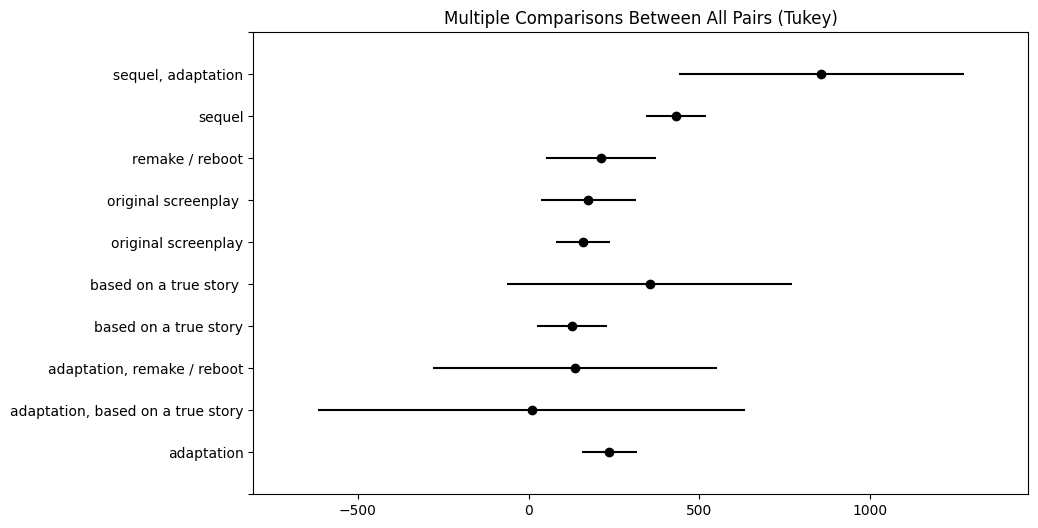

In [ ]:
tukey_test(df_aux, 'Script Type', 'Worldwide Gross ($million)')

#### Existem alguns tipos de script que arrecadam mais do que outros, por exemplo

- Sequencia arrecada mais que adaptação
- Sequencia arrecada mais que filmes baseados em histórias reais
- Sequencia arrecada mais que roteiro original

Conclusão: se você estiver em dúvida de que tipo de roteiro escrever pra arrecadar muito dinheiro mundialmente, escreva uma sequência

### 5. Regressão OLS para testar um conjunto de variáveis

In [ ]:
# resete os dados
df4 = df3.copy()

#### 1. Defina a função de regressão OLS (ordinary least square)

In [ ]:
def run_ols(y, X):
    """
    Realiza uma regressão OLS usando as variáveis fornecidas.

    Parâmetros:
    y (pandas.Series): A variável dependente a ser usada na regressão.
    X (pandas.DataFrame): Um DataFrame contendo as variáveis independentes a serem usadas na regressão.

    Retorna:
    statsmodels.regression.linear_model.RegressionResultsWrapper: O resultado da regressão OLS.
    """
    # Adiciona uma constante às variáveis independentes
    X = sm.add_constant(X)

    # Verifica se há colunas não numéricas em X e tenta convertê-las para o tipo category
    if not all(X.dtypes.isin([int, float])):
        for col in X.columns:
            if not pd.api.types.is_numeric_dtype(X[col]):
                X[col] = X[col].astype('category')
                X[col] = X[col].cat.codes.astype('float')
            else:
                X[col] = pd.to_numeric(X[col], errors='coerce')

    # Cria e ajusta o modelo de regressão
    model = sm.OLS(y, X)
    results = model.fit()

    # Retorna o resultado da regressão OLS
    return results

#### 2. Defina a base de dados com as variáveis que quer testar

In [ ]:
df4.columns

Index(['Film', 'Rotten Tomatoes % critics', 'Metacritic % critics',
       'Average critics %', 'Rotten Tomatoes Audience %',
       'Metacritic Audience %', 'Rotten Tomatoes vs Metacritic % deviance',
       'Average audience %', 'Audience vs Critics deviance %', 'Primary Genre',
       'Genres', 'Script Type', 'Opening weekend ($million)',
       'Opening Weekend', 'Domestic gross ($million)', 'Domestic Gross',
       'Foreign Gross ($million)', 'Foreign Gross', 'Worldwide Gross',
       'Worldwide Gross ($million)', '% of Gross earned abroad',
       'Budget ($million)', '% Budget recovered',
       '% Budget recovered opening weekend', 'Year_x', 'Oscar Winners',
       'Oscar Detail', 'Link', 'Rank', 'Title', 'Genre', 'Description',
       'Director', 'Actors', 'Year_y', 'Runtime (Minutes)', 'Rating', 'Votes',
       'Revenue (Millions)', 'Metascore', 'Action', 'Adventure', 'Animation',
       'Biography', 'Comedy', 'Crime', 'Drama', 'Family', 'Fantasy', 'History',
       'Horror',

In [ ]:
data = {'y': df4['Rating'], 'duracao': df4['Runtime (Minutes)'], 'tipo-roteiro': df4['Script Type'], 'genero-principal': df4['Primary Genre']}
df = pd.DataFrame(data)

In [ ]:
len(df)

506

#### 3. Drope as linhas com valores faltantes e calcule a % de valores perdidos. O ideal é que seja bem pouco (menor de 10%)

In [ ]:
df2 = df[['y','duracao','tipo-roteiro', 'genero-principal']].dropna()
len(df)

506

In [ ]:
print(f'{round((1-(len(df2)/len(df)))*100,2)}''%'' da base foi perdida')

0.0% da base foi perdida


#### 4. Rode a função ols e interprete os resultados. Tem um exemplo de interpretação no final.

In [ ]:
df['tipo-roteiro'] = df['tipo-roteiro'].astype('category')
df['genero-principal'] = df['genero-principal'].astype('category')

In [ ]:
results = run_ols(df['y'], df[['duracao','tipo-roteiro', 'genero-principal']])
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.141
Model:                            OLS   Adj. R-squared:                  0.135
Method:                 Least Squares   F-statistic:                     27.37
Date:                Tue, 01 Aug 2023   Prob (F-statistic):           2.08e-16
Time:                        23:15:39   Log-Likelihood:                -599.41
No. Observations:                 506   AIC:                             1207.
Df Residuals:                     502   BIC:                             1224.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                4.9902      0.249  

#### Interpretação dos resultados da regressão OLS

- os resultados sugerem que a duração do filme tem um impacto estatisticamente significativo no Rating do filme:
filmes de maior duração são melhor avaliados.

- o tipo de roteiro tem uma relação significativa com o rating, sugerindo que a depender do tipo, a avaliação pode ser menor

- o gênero principal do filme parece não exercer influência para a avaliação.

### Salve os dados para usar na etapa de feature engeneering

In [ ]:
df3.to_excel('df_filmes_pre_processada.xlsx',index=False)